In [18]:
'''
This cell is only to prepare data for the example
'''
import os, json, folium
os.chdir('C:/Users/a179227/OneDrive - Alliance/perso Wx/ES standard/python ESstandard/ES')
from ESObservation import Observation, ResultValue, ES, LocationValue, DatationValue
from pprint import pprint
with open('C:\\Users\\a179227\\OneDrive - Alliance\\perso Wx\\ES standard\\python ESstandard\\departements-version-simplifiee.geojson') as f: 
    dp = f.read()
dpt = json.loads(dp)['features']
pol13 = {dpt[12]['properties']['code'] + ' ' + dpt[12]['properties']['nom'] : dpt[12]['geometry']['coordinates']}
pol69 = {dpt[69]['properties']['code'] + ' ' + dpt[69]['properties']['nom'] : dpt[69]['geometry']['coordinates']}
pol75 = {dpt[75]['properties']['code'] + ' ' + dpt[75]['properties']['nom'] : dpt[75]['geometry']['coordinates']}
paris       = [2.35, 48.87]
lyon        = [4.83, 45.76]
marseille   = [5.38, 43.3]
pol75

{'75 Paris': [[[2.416339717281352, 48.84923827340741],
   [2.4622646327720443, 48.84253748930953],
   [2.4626974524261254, 48.81905707868419],
   [2.4384502049151475, 48.818235158647155],
   [2.4006819201840903, 48.82909612370583],
   [2.363949262797974, 48.81631512383787],
   [2.3318953139887446, 48.81701271305569],
   [2.2790573794463054, 48.83248998498127],
   [2.2242245702250814, 48.85351605360998],
   [2.2317363464837308, 48.869069480870024],
   [2.258472586492028, 48.88038999464371],
   [2.277487004862913, 48.87797011937597],
   [2.319884458526643, 48.90045886733916],
   [2.385151006972503, 48.902007792208785],
   [2.4139437894422056, 48.87082877761242],
   [2.416339717281352, 48.84923827340741]]]}

datation name  location name  property name  result value   
_____________  _____________  _____________  _____________  
morning        paris           Temp          high           
morning        lyon            Temp          low            
morning        marseille       Temp          very high      


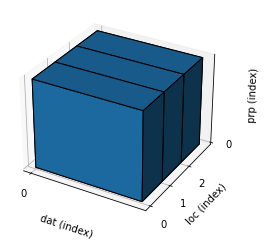

{'datvalue': 'morning',
 'locvalue': ['paris', 'lyon', 'marseille'],
 'prpvalue': ' Temp',
 'resvalue': ['high', 'low', 'very high'],
 'type': 'observation'}


In [19]:
''' 
An observation is a set of results in response to the questions: when, where, what, how much.
The most simple and complete Observation you can create is for example :
'''
ob=Observation(('morning', 'paris', ' Temp', 'high'))
''' 
This Observation can be supplemented by other results :
'''
ob.append('morning', 'lyon', ' Temp', 'low')
ob.append('morning', 'marseille', ' Temp', 'very high')
'''
We can see this Observation in different ways : 
 - The "view" shows you a list with all the informations.
 - The "voxel" represent the quantity of data for each axe ( 1 for Datation, 3 for Location, 1 for Property).
 - The "json" is a the representation of the data in the JSON format.

'''
ob.view(True, False, False, False)
ob.voxel()
pprint(json.loads(ob.json))

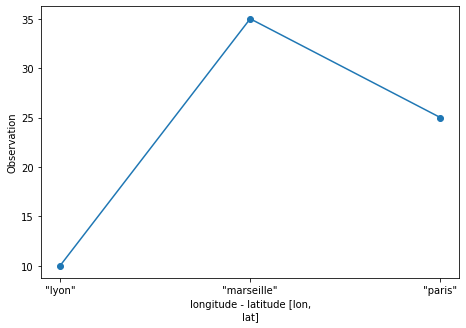

In [20]:
'''
The String values can be changed to numerical values. It allows to use plotting functions
'''
ob.majList(ResultValue, [25, 10, 35]) 
ob.plot()

In [21]:
'''
Similarly if we complete the alphanumeric Location values with geographic coordinates, we can visualize the data 
on a map with point or polygon if the area is large :
'''
print(ob.setLocation)
ob.majList(LocationValue, [lyon, marseille, paris])   # i.e. paris = [2.35, 48.87]
ob.view(True, False, True, False)
display(ob.choropleth())

print(ob.setLocation)
ob.majList(LocationValue, [pol75, pol69, pol13])      # i.e. pol75 = {'75 Paris': [[[2.416, 48.849], [2.462, 48.842], ....
display(ob.choropleth())



"locvalue":["lyon", "marseille", "paris"]

datation name  location name  location coor  location coor  property name  result value   
_____________  _____________  _____________  _____________  _____________  _____________  
morning        lyon           4.83           45.76           Temp          10             
morning        marseille      5.38           43.3            Temp          35             
morning        paris          2.35           48.87           Temp          25             



"locvalue":[{"paris": [2.35, 48.87]}, {"lyon": [4.83, 45.76]}, {"marseille": [5.38, 43.3]}]



datation name  location name  property name  result value   
_____________  _____________  _____________  _____________  
morning        paris           Temp          25             
morning        lyon            Temp          10             
morning        marseille       Temp          35             
morning        paris          Humidity       30             
morning        marseille      Humidity       60             


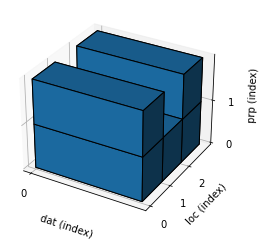

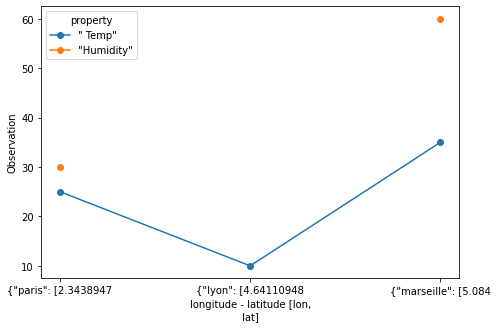

In [22]:
''' 
We now add some more Results with a new Property (Humidity) :
'''
ob.append('morning', 'paris', 'Humidity', 30, equal='name')
ob.append('morning', 'marseille', 'Humidity', '60', equal='name')
'''
In the several views, we see that the values are now distributed along two dimensions (Location, Property). 
'''
ob.view(True, False, False, False)
ob.voxel()
ob.plot()


"datvalue":["morning", "afternoon"]

datation name  datation insta location name  location coor  location coor  property name  result value   
_____________  _____________  _____________  _____________  _____________  _____________  _____________  
morning        2021-05-05T10: paris          4.83           45.76           Temp          25             
morning        2021-05-05T10: paris          4.83           45.76          Humidity       30             
morning        2021-05-05T10: lyon           5.38           43.3            Temp          10             
morning        2021-05-05T10: marseille      2.35           48.87           Temp          35             
morning        2021-05-05T10: marseille      2.35           48.87          Humidity       60             
afternoon      2021-05-05T16: paris          4.83           45.76           Temp          28             
afternoon      2021-05-05T16: lyon           5.38           43.3            Temp          15             


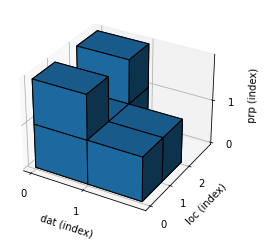

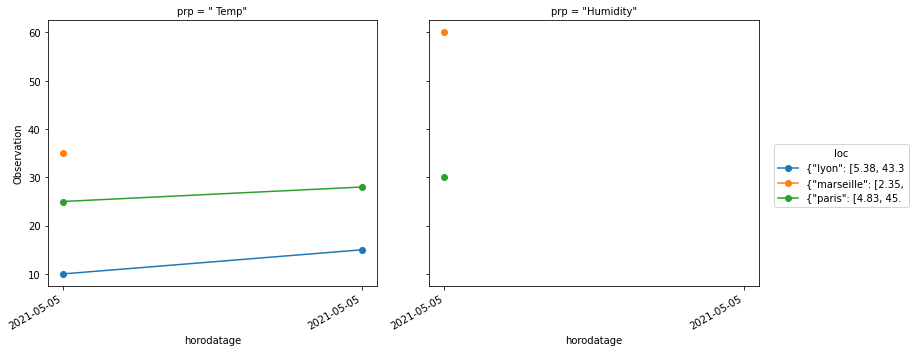

In [23]:
'''
Keep adding data !! 
We add now Result with a new Datation and we put the old Location values back (to keep data simple).
For the Datation value, we add a timestamp.
'''
ob.append('afternoon', 'paris', ' Temp', 28, equal='name')
ob.append('afternoon', 'lyon', ' Temp', 15, equal='name')
ob.majList(LocationValue, [lyon, marseille, paris])   # i.e. paris = [2.35, 48.87]
'''
The values are distributed along the three Dimension and the representations evolve to take the dimension 
into account.
'''
print(ob.setDatation)
ob.majList(DatationValue, ["2021-05-05T10", "2021-05-05T16"])
ob.view(prp=False, width=15)
ob.voxel()
ob.plot()


In [24]:
'''
Finally, we show you a new representation of the data with a Xarray : a 3D Matrix for the Result and some index 
for Location, Datation and Property. Xarray is very powerful to analyze and process this kind of data.
You will notice that the data has been completed with nan values to fill in the matrix.
'''
ob.to_xarray(numeric=True)


<xarray.DataArray 'Observation' (dat: 2, loc: 3, prp: 2)>
array([[[35., 60.],
        [25., 30.],
        [10., nan]],

       [[nan, nan],
        [28., nan],
        [15., nan]]])
Coordinates:
  * loc      (loc) int32 0 1 2
    loclon   (loc) float64 2.35 4.83 5.38
    loclat   (loc) float64 48.87 45.76 43.3
    locnam   (loc) <U9 'marseille' 'paris' 'lyon'
  * dat      (dat) datetime64[ns] 2021-05-05T10:00:00 2021-05-05T16:00:00
    datnam   (dat) <U9 'morning' 'afternoon'
  * prp      (prp) int32 0 1
    prpnam   (prp) <U8 ' Temp' 'Humidity'

In [27]:
'''
Finally, here is a summary in terms of data : 
- the JSON show you all the data we define (in a very compact structure).
- the Dictionnary presents the main informations associated to the Observation with in particular :
    * the boundingbox for the Location value
    * the timebox for the Datation value (an equivalent of the boundingbox for the dates)
    * a 'complet' boolean to indicate if the matrix is full or not
    * the 'measureRate' (ratio between the measure number and the complete number : 7 / 12 in the example)
    * the dimension of the Observation (1, 2 or 3)
    * the axes that make up the dimension.
    
Note: If you are very careful, you will notice that there is a problem with the Result values in the JSON 
because we don't know how to match a Result value to a Datation value, a Property value and a Location value
and you are right!!
This point will be clarified later.
'''
pprint(json.loads(ob.json), indent=2)

ob._info(string=False)

{ 'datvalue': [ {'morning': '2021-05-05T10:00:00'},
                {'afternoon': '2021-05-05T16:00:00'}],
  'locvalue': [ {'marseille': [2.35, 48.87]},
                {'paris': [4.83, 45.76]},
                {'lyon': [5.38, 43.3]}],
  'prpvalue': [' Temp', 'Humidity'],
  'resvalue': [35, 60, 25, 30, 10, 28, 15],
  'type': 'observation'}


{'typeobs': 'obsGrid',
 'typeloc': 'MultilocationValue',
 'typedat': 'MultidatationValue',
 'typeprop': 'MultipropertyValue',
 'typeres': 'MultiresultValue',
 'nvalloc': 3,
 'nvaldat': 2,
 'nvalprop': 2,
 'nvalres': 7,
 'boudingBox': [2.35, 43.3, 5.38, 48.87],
 'timeBox': ['2021-05-05T10:00:00', '2021-05-05T16:00:00'],
 'complet': False,
 'score': 228,
 'measureRate': 0.5833333333333334,
 'dim': 3,
 'axes': [0, 1, 2]}